In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


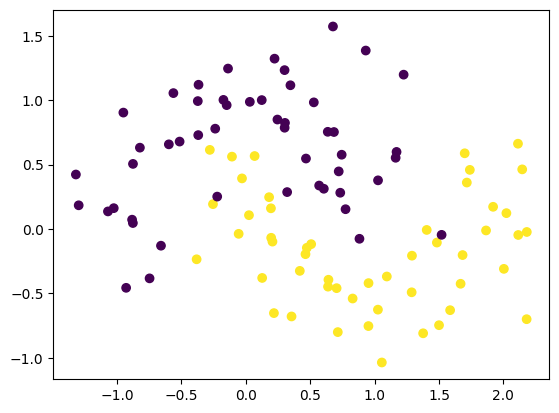

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
x=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [6]:
import tensorflow as tf
from tensorflow import  keras
from keras import  Sequential
from keras.layers import Dense

In [7]:
model=Sequential()

In [8]:
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.get_weights()

[array([[-0.17916405, -0.51493835, -0.08997321, -0.5291338 , -0.3583345 ,
          0.5689632 ,  0.14211476,  0.29744095, -0.16144115,  0.30512148],
        [ 0.58524877,  0.10530591,  0.09766775, -0.5269177 ,  0.24732494,
          0.25091046, -0.7071041 , -0.59854895, -0.7058024 ,  0.49247998]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.7175296 ],
        [-0.15883708],
        [ 0.59041137],
        [-0.7170623 ],
        [ 0.5736671 ],
        [-0.73744506],
        [-0.14418745],
        [ 0.61604935],
        [-0.3342021 ],
        [-0.65463513]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights=model.get_weights()

In [11]:
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5117 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4805 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5195 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5234 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5156 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss:

In [16]:
model.get_weights()

[array([[-0.46678874, -0.46678874, -0.46678874, -0.46678874, -0.46678874,
         -0.46678874, -0.46678874, -0.46678874, -0.46678874, -0.46678874],
        [ 0.49238074,  0.49238074,  0.49238074,  0.49238074,  0.49238074,
          0.49238074,  0.49238074,  0.49238074,  0.49238074,  0.49238074]],
       dtype=float32),
 array([-0.10010603, -0.10010603, -0.10010603, -0.10010603, -0.10010603,
        -0.10010603, -0.10010603, -0.10010603, -0.10010603, -0.10010603],
       dtype=float32),
 array([[-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432],
        [-0.06740432]], dtype=float32),
 array([0.06387423], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 653us/step


<Axes: >

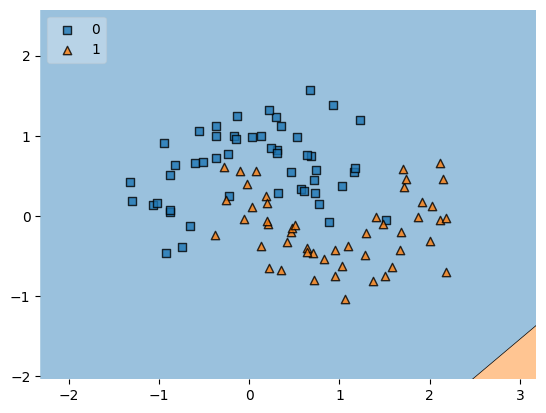

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)

# Initialization with constant values:
-> we can't initialize our value to 0 and also with non zero constant
 -> else we initialize the value to random....

In [18]:
model=Sequential()  

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\raush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.get_weights()

[array([[-0.0587635 , -0.5883966 ,  0.23541844,  0.6994533 ,  0.21980458,
         -0.0579477 , -0.6862591 ,  0.05874127, -0.5828425 , -0.6108626 ],
        [-0.61900467, -0.05985963,  0.413099  ,  0.14870352, -0.33589926,
          0.47704142,  0.6552864 , -0.34555948,  0.1777584 , -0.6579386 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.32340464],
        [ 0.31114978],
        [ 0.09923077],
        [-0.4733606 ],
        [ 0.4064861 ],
        [-0.024046  ],
        [-0.67163235],
        [-0.294644  ],
        [-0.6011412 ],
        [-0.16736215]], dtype=float32),
 array([0.], dtype=float32)]

In [20]:
initial_weights=model.get_weights()

In [21]:
initial_weights[0]=np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model.get_weights()[3].shape)*0.5

In [22]:
model.set_weights(initial_weights)

In [23]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history=model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4531 - loss: 2.2158 - val_accuracy: 0.5000 - val_loss: 1.8428
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4922 - loss: 2.0547 - val_accuracy: 0.5000 - val_loss: 1.8308
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4766 - loss: 2.0787 - val_accuracy: 0.5000 - val_loss: 1.8185
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4922 - loss: 2.0145 - val_accuracy: 0.5000 - val_loss: 1.8062
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5234 - loss: 1.8610 - val_accuracy: 0.5000 - val_loss: 1.7940
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5078 - loss: 1.9134 - val_accuracy: 0.5000 - val_loss: 1.7817
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4648 - loss: 2.0936 - val_accuracy: 0.5000 - val_loss: 1.7695
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5352 - loss: 1.7996 - val_accuracy: 0.5000 - val_loss:

In [26]:
model.get_weights()

[array([[0.42938766, 0.42938766, 0.42938766, 0.42938766, 0.42938766,
         0.42938766, 0.42938766, 0.42938766, 0.42938766, 0.42938766],
        [0.2454368 , 0.2454368 , 0.2454368 , 0.2454368 , 0.2454368 ,
         0.2454368 , 0.2454368 , 0.2454368 , 0.2454368 , 0.2454368 ]],
       dtype=float32),
 array([0.25683147, 0.25683147, 0.25683147, 0.25683147, 0.25683147,
        0.25683147, 0.25683147, 0.25683147, 0.25683147, 0.25683147],
       dtype=float32),
 array([[0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821],
        [0.23138821]], dtype=float32),
 array([0.22292574], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 632us/step


<Axes: >

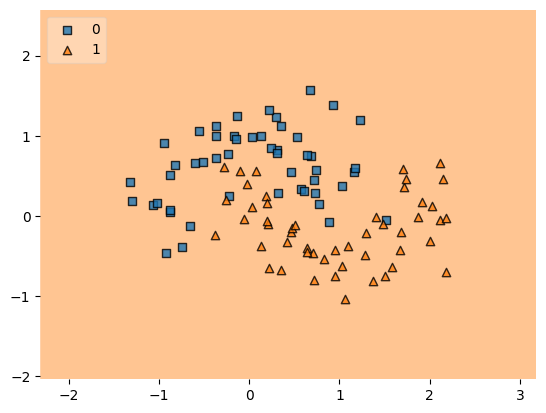

In [27]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)